# BigMart Sales Prediction

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

## About the data

- Item_Identifier: Unique product ID
- Item_Weight: Weight of product
- Item_Fat_Content: Weather the product is low in fat
- Item_Visibility: the percentage of total display area of all products in a store allocated to the particular product
- Item_Type: the category to which the product belongs
- Item_MRP: Maximum Retail Price of the product
- Outlet_Identifier: UNique store ID
- Outlet_Establishment_Year: the year in which store was established
- Outlet_Size: the size of store in terms of area covered
- Outlet_Location_Type: the type of city in which store is located 
- Outlet_Type: Weather the outlet is a grocery store or a supermarket
- Item_Outlet_Sales: Sales of product in a particular store

In [1]:
import pandas as pd 
import numpy as np

train = pd.read_csv(r'C:\Users\User\Desktop\Projects\bigdatamart_Train.csv')
test = pd.read_csv(r'C:\Users\User\Desktop\Projects\bigdatamart_Test.csv')

train.shape, test.shape

((8523, 12), (5681, 11))

In [2]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


ML models only understand input data in the form of numbers, hence we need to convert object type values into numbers through the process of label encoding or one hot encoding technique.

In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

From the above, we see that only two columns have null values associated with them which are Item_Weight and Outlet_Size in both train and test samples.

In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


- Mean item weight is 12
- Mean MRP is 140
- Mean sales are 2181

In [9]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [10]:
train.describe(include=['O'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [11]:
test.describe(include=['O'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,5681,5681,5681,4075,5681,5681
unique,1543,5,16,10,3,3,4
top,DRF48,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type1
freq,8,3396,789,624,1862,2233,3717


# EDA

We will be performing vizualization's on train data only

### Vizualizing categorical variables

In [12]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

#### Item Fat

In [13]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [14]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('low fat','Low Fat')
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('LF','Low Fat')
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('reg','Regular')

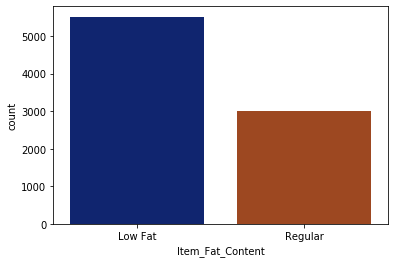

In [15]:
sns.countplot(train["Item_Fat_Content"],palette = 'dark')
plt.show()

There are more low fat items in the store.

#### Item Type

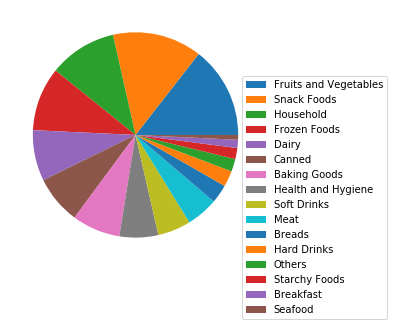

In [16]:
ser1= train.Item_Type.value_counts()

plt.figure(figsize=(6,6))
plt.pie( x = ser1.values)
plt.legend(labels=train['Item_Type'].value_counts().index, loc="best",bbox_to_anchor=(1, 0.25, 0.5, 0.5))
plt.tight_layout()

Fruits nd vegetables constitue the highest item type available in the stores

#### Outlet Identifier

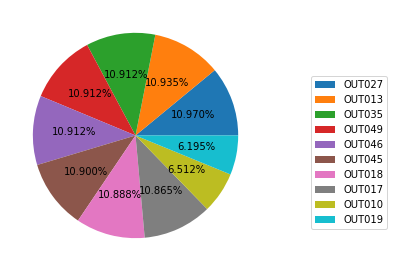

In [17]:
ser1= train.Outlet_Identifier.value_counts()

plt.figure(figsize=(6,6))
plt.pie( x = ser1.values, autopct = '%1.3f%%')
plt.legend(labels=train['Outlet_Identifier'].value_counts().index, loc="best",bbox_to_anchor=(1, 0.25, 0.5, 0.5))
plt.tight_layout()

OUT027 is the most commonn item identifier

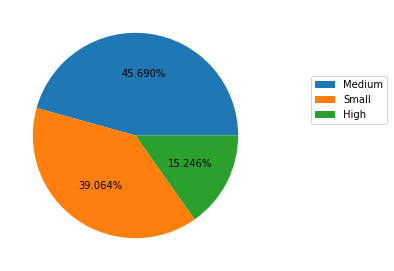

In [18]:
ser1= train.Outlet_Size.value_counts()

plt.figure(figsize=(6,6))
plt.pie( x = ser1.values, autopct = '%1.3f%%')
plt.legend(labels=train['Outlet_Size'].value_counts().index, loc="best",bbox_to_anchor=(1, 0.25, 0.5, 0.5))
plt.tight_layout()

Most common outlet size is Medium, followed by small and high

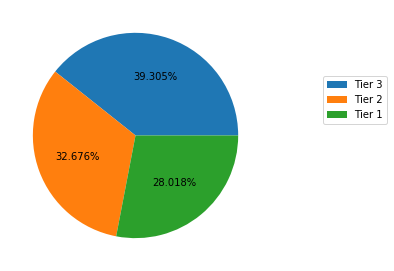

In [19]:
ser1= train.Outlet_Location_Type.value_counts()

plt.figure(figsize=(6,6))
plt.pie( x = ser1.values, autopct = '%1.3f%%')
plt.legend(labels=train['Outlet_Location_Type'].value_counts().index, loc="best",bbox_to_anchor=(1, 0.25, 0.5, 0.5))
plt.tight_layout()

Most common outlet location type is Tier 3, followed by Tier 2 and Tier 1

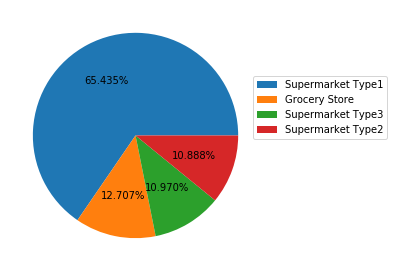

In [20]:
ser1= train.Outlet_Type.value_counts()

plt.figure(figsize=(6,6))
plt.pie( x = ser1.values, autopct = '%1.3f%%')
plt.legend(labels=train['Outlet_Type'].value_counts().index, loc="best",bbox_to_anchor=(1, 0.25, 0.5, 0.5))
plt.tight_layout()

Outlets considered in this dataset are mostly Type1 Supermarkets

## Correlating Categorical Variable with Target Variables

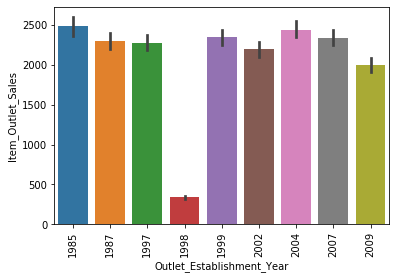

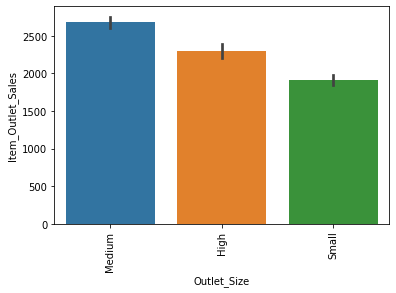

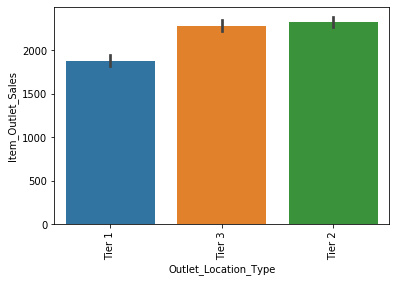

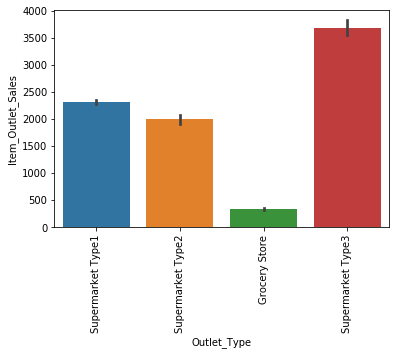

In [21]:
for i in train[['Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']].columns:
    chart = sns.barplot(x=train[i], y=train['Item_Outlet_Sales'])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

We can infer that:
- Grocery store makes really low sales
- Teir1 has comparatively low sales
- The year 1998 observed very low sales
- Outlets which are small in size make comparatively low sales

Conclusion
- Different variable types are varying wrt sales, which means they play a role in determining the sales

#### Item Type vs Sales

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

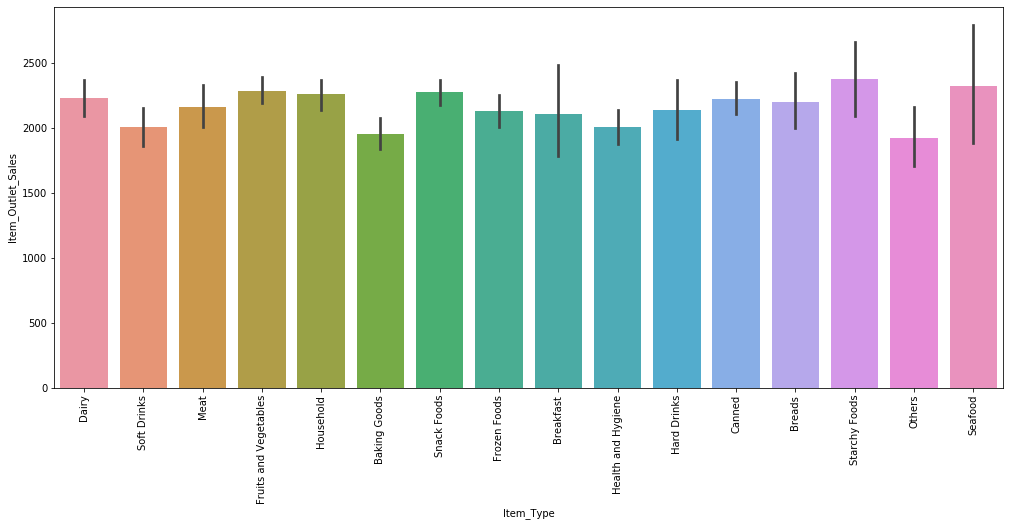

In [22]:
plt.figure(figsize=(17,7))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=train)
plt.xticks(rotation=90)

Inference
- Starchy Foods, Seafood and Snack Foods experience highest sales
- soft drinks, baking goods, and health and hygene and Hygiene Product's have a comparatively low sales

Conclusion
- Different item type are varying wrt sales, which means the item type does play a role in determining the sales

### Vizualizing continous variables

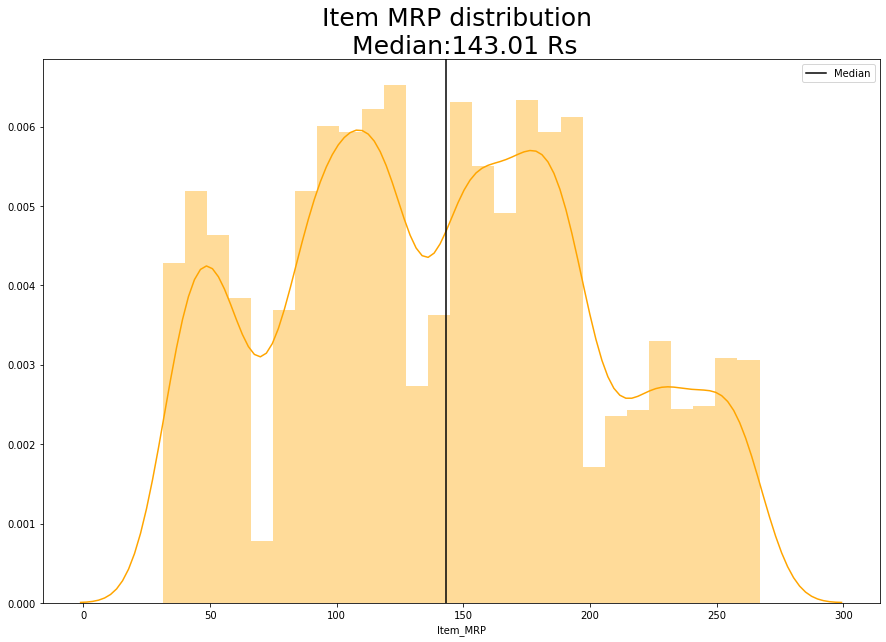

In [23]:
plt.figure(figsize=(15,10))
sns.distplot(train['Item_MRP'],color='orange')
plt.title('Item MRP distribution \n Median:{0:.2f} Rs'.format(train['Item_MRP'].median()),size=25)
plt.axvline(train['Item_MRP'].median(),color='black',label='Median')
plt.legend()

There is no clear distribution of the prices. Distribution is multi modal in nature with mulitple peaks.

Inferences:

- There are a fair number of products whose prices range from 25-75 Rs.
- There are a fair number of products in the 80-120 Rs range (highest).
- The products increase again from 150-200 Rs range.
- There are fair number of products from 220-240 Rs range aswell.

#### Mrp Vs Item Type

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

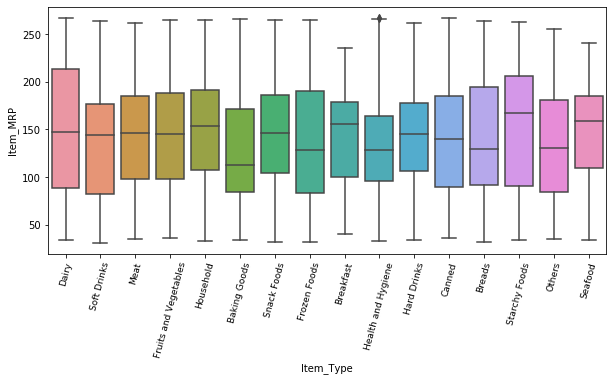

In [24]:
labels= train['Item_Type'].unique()
fig6=plt.figure(figsize=(10,10))
ax1 = fig6.add_subplot(211)
sns.boxplot(x='Item_Type',y='Item_MRP',data=train)
ax1.set_xticklabels(labels, rotation=75,size=9)

- From the above plot, we see which item types have varying MRPs.
- Starchy foods, Household and Seafood product have a higher median price than the rest.

#### Mrp Vs Item Fat Content

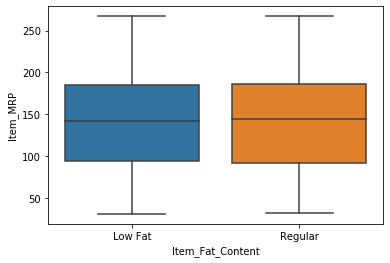

In [25]:
sns.boxplot(x='Item_Fat_Content',y='Item_MRP',data=train)

Both low and regular food have almost identical median price.

#### Outlet Identifier

In [26]:
train['Count']=1

In [27]:
df_outlets = train.groupby('Outlet_Identifier')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)

([<matplotlib.axis.YTick at 0x24a359b07c8>,
 <a list of 11 Text yticklabel objects>)

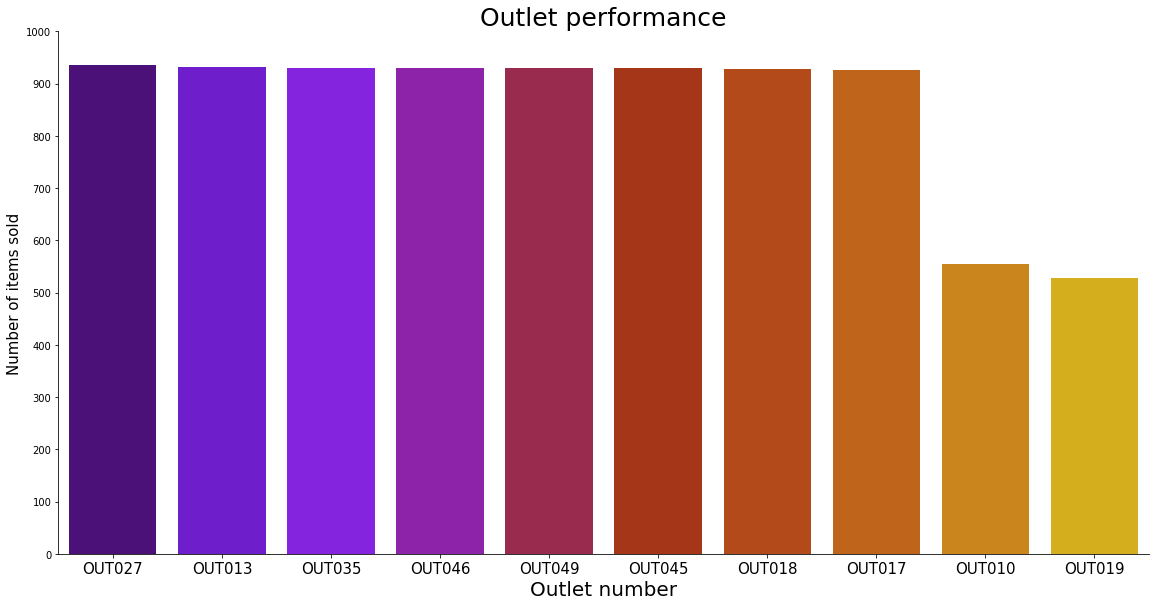

In [28]:
sns.catplot('Outlet_Identifier','Count',data=df_outlets,aspect=2,height=8,kind='bar',palette='gnuplot')
plt.xticks(size=15)
plt.ylabel('Number of items sold',size=15)
plt.xlabel('Outlet number',size=20)
plt.title('Outlet performance',size=25)
plt.yticks(np.arange(0,1100,100))

Most of the outlets have performed similarly with approximately 950 items sold. Outlet 10 and 19 are however lagging behind in sales.

#### Outlet Establishment Year Vs Mrp

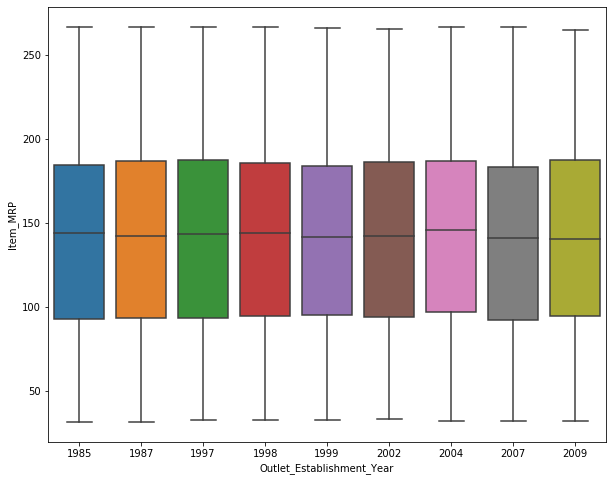

In [29]:
plt.figure(figsize=(10,8))
sns.boxplot('Outlet_Establishment_Year','Item_MRP',data = train)

No matter how old the shops are, the median prices of items sold is nearly the same. Hence, customers have no bias to buy more expensive products from older or newer markets.

#### Outlet Establishment Year Vs Sales

Text(0.5, 1.0, 'Outlet sales')

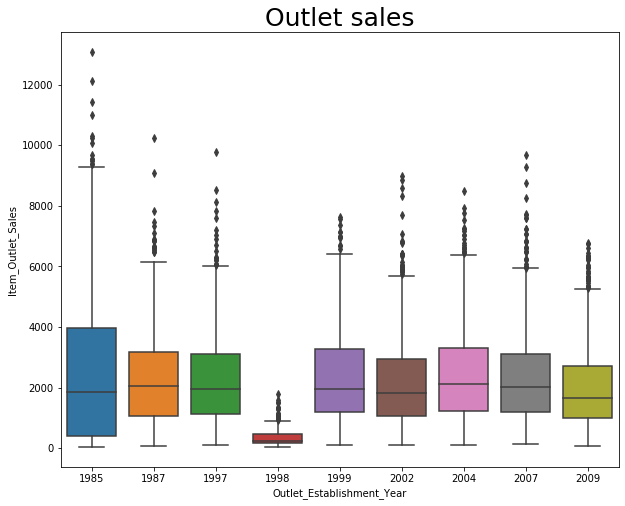

In [30]:
plt.figure(figsize=(10,8))
sns.boxplot('Outlet_Establishment_Year','Item_Outlet_Sales',data=train)
plt.title('Outlet sales',size=25)

Sales reported by the older stores is higher than the relatively newer stores (except for the 1998 established store)

#### something

In [31]:
df_size_sales=train.groupby('Outlet_Size')[['Item_MRP','Item_Outlet_Sales']].mean().reset_index()

Text(0.5, 1.0, 'Average sales of store')

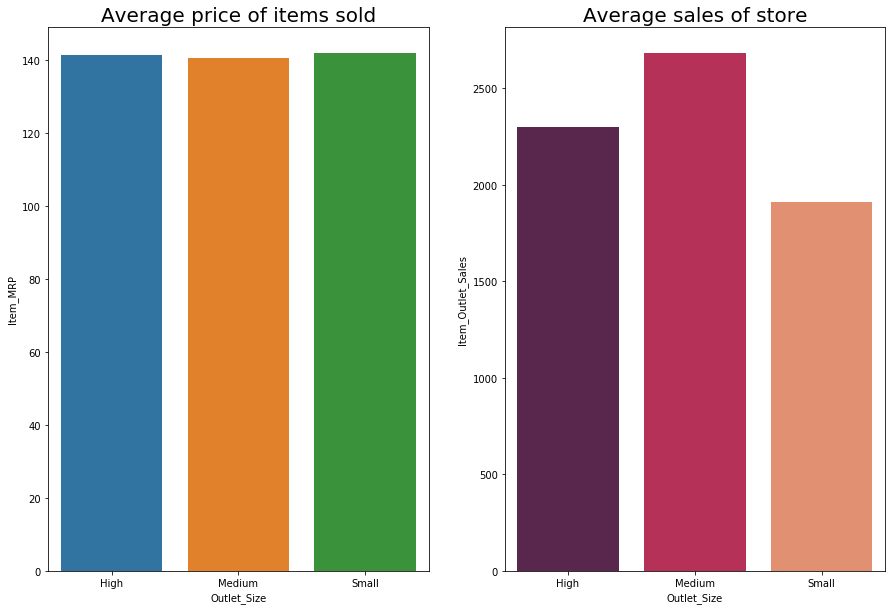

In [32]:
fig8=plt.figure(figsize=(15,10))
ax1=fig8.add_subplot(121)
sns.barplot('Outlet_Size','Item_MRP',data=df_size_sales,ax=ax1)

ax2=fig8.add_subplot(122)
sns.barplot('Outlet_Size','Item_Outlet_Sales',data=df_size_sales,ax=ax2,palette='rocket')

ax1.set_title('Average price of items sold',size=20)
ax2.set_title('Average sales of store',size=20)

- Irrespective of the size all the outlets have almost an equal average price of item's sold which is 140
- Medium size outlet's make the highest sales followed by high sized and then small sized stores.

In [33]:
train.drop('Count',axis=1,inplace=True)

## Feature Engineering

#### Combining the train and test data for performing feature engineering

In [34]:
df = pd.concat([test.assign(ind="test"), train.assign(ind="train")])
df.shape

(14204, 13)

The column Item Fat Content has entries that are repeetive, hence they can be treated

In [35]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')

#### Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Item_Fat_Content'])
df['Item_Fat_Content']=le.transform(df['Item_Fat_Content'])

In [37]:
df['Outlet_Location_Type'].replace('Tier 1',1,inplace=True)
df['Outlet_Location_Type'].replace('Tier 2',2,inplace=True)
df['Outlet_Location_Type'].replace('Tier 3',3,inplace=True)

#### Correlation among variables

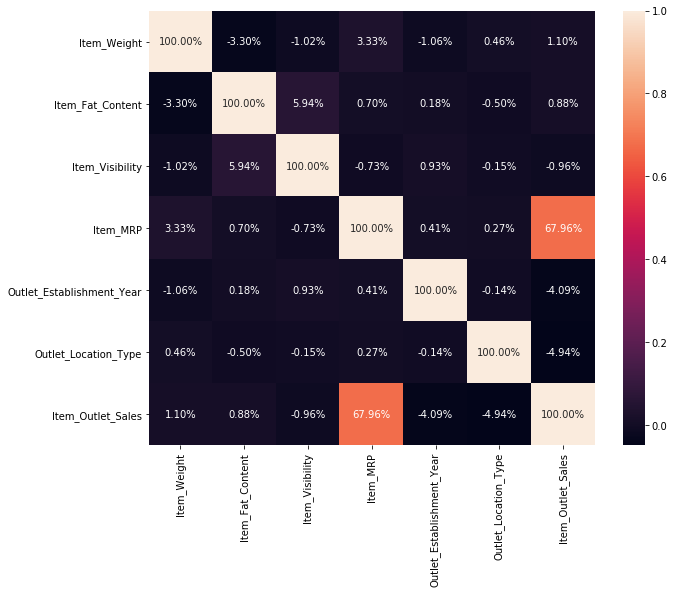

In [38]:
corrs=df.dropna().corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrs,annot=True,fmt='.2%')

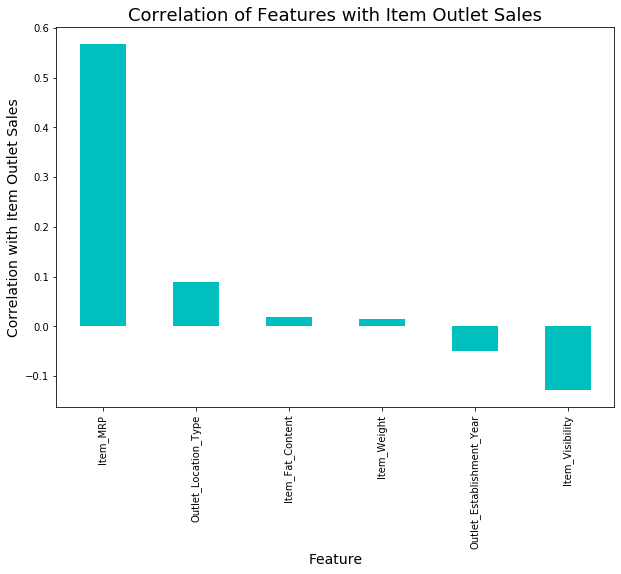

In [39]:
plt.figure(figsize=(10,7))
df.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with Item Outlet Sales',fontsize=14)
plt.title('Correlation of Features with Item Outlet Sales',fontsize=18)
plt.show()

- It is clear that correlation of Item_Weight is extremely low. Hence, we can simply drop this column and get done with the issues of null values.

- We shall similarly remove the outlet_size as there is no way to deal with the null values here aswell. 

- We would also get rid of the item_identifier and outlet_indetifier since it is of no consequence to us.

In [40]:
df = df.drop(['Item_Weight','Outlet_Size','Item_Identifier','Outlet_Identifier'], axis=1)

### Data Wrangling

Here, we have multiple number of item types and Outlet Types it'll be quite difficult for us to label the items individually. Instead, what we could do is we can use one-hot-encoding.

In [41]:
dummy = pd.get_dummies(df['Item_Type'])
df = pd.concat([df,dummy], axis=1)
df.shape

(14204, 25)

In [42]:
dummy = pd.get_dummies(df['Outlet_Type'])
df = pd.concat([df,dummy], axis=1)
df.shape

(14204, 29)

In [43]:
df = df.drop(['Outlet_Type', 'Item_Type'], axis=1)
df.shape

(14204, 27)

#### Splitting the train and test data to perform training

In [44]:
test, train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]

In [45]:
test = test.drop(['ind','Item_Outlet_Sales'], axis=1)

In [46]:
train = train.drop(['ind'], axis=1)

#### Seperating the Item_Outlet_Size  from the train data 

In [47]:
targets = train['Item_Outlet_Sales']
train.drop('Item_Outlet_Sales',axis=1,inplace=True)
train.shape, targets.shape, test.shape

((8523, 25), (8523,), (5681, 25))

This is the target section for us which we will try to predict. Hence, we shall separate it out from the rest of the dataframe.

In [48]:
train.isnull().sum()

Item_Fat_Content             0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Baking Goods                 0
Breads                       0
Breakfast                    0
Canned                       0
Dairy                        0
Frozen Foods                 0
Fruits and Vegetables        0
Hard Drinks                  0
Health and Hygiene           0
Household                    0
Meat                         0
Others                       0
Seafood                      0
Snack Foods                  0
Soft Drinks                  0
Starchy Foods                0
Grocery Store                0
Supermarket Type1            0
Supermarket Type2            0
Supermarket Type3            0
dtype: int64

In [49]:
targets.isnull().sum()

0

In [50]:
test.isnull().sum()

Item_Fat_Content             0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Baking Goods                 0
Breads                       0
Breakfast                    0
Canned                       0
Dairy                        0
Frozen Foods                 0
Fruits and Vegetables        0
Hard Drinks                  0
Health and Hygiene           0
Household                    0
Meat                         0
Others                       0
Seafood                      0
Snack Foods                  0
Soft Drinks                  0
Starchy Foods                0
Grocery Store                0
Supermarket Type1            0
Supermarket Type2            0
Supermarket Type3            0
dtype: int64

There are no missing value's hence we can move forward with training the phase

# Training Phase

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(train,targets,test_size=.20,random_state=55)

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test = train_test_split(train,targets,random_state = r_state, test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print('max r2 score corresponding to', final_r_state, 'is', max_r_score)

max r2 score corresponding to 62 is 0.5833682168839456


In [53]:
x_train, x_test, y_train,y_test = train_test_split(train,targets,test_size=.20,random_state=62)

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

## Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
lm.score(x_train, y_train)
pred_linear = lm.predict(x_test)

lms = r2_score(y_test,pred_linear)
print('R2 Score:',lms*100)

lmscore = cross_val_score(lm,train,targets,cv=5)
lmc = lmscore.mean() 
print('Cross Val Score:',lmc*100)

R2 Score: 58.33682168839456
Cross Val Score: 55.82175855336313


In [56]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_linear))
print('Mean Squared Error:',mean_squared_error(y_test,pred_linear))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_linear)))

Error:
Mean Absolute Error: 802.5064901612711
Mean Squared Error: 1204845.0616789055
Root Mean Square Error: 1097.654345264895


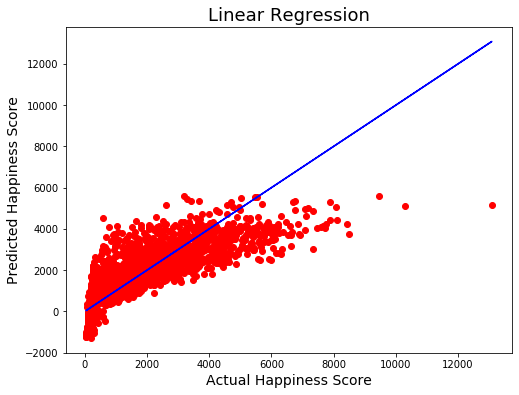

In [57]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_linear, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

## Lasso Regression

In [58]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
print('R2 Score:',lss*100)

lsscore = cross_val_score(ls,train,targets,cv=5)
lsc = lsscore.mean() 
print('Cross Val Score:',lsc*100)

R2 Score: 58.336840661553104
Cross Val Score: 55.82177146652722


In [59]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:
Mean Absolute Error: 802.5062779079337
Mean Squared Error: 1204844.5129997768
Root Mean Square Error: 1097.654095332303


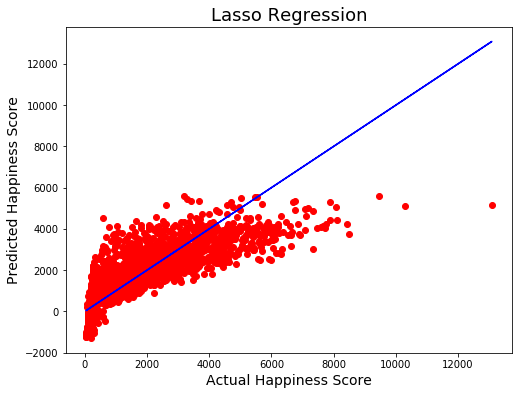

In [60]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_ls, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

## Ridge Regression

In [61]:
from sklearn.linear_model import Ridge
rd = Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd = rd.predict(x_test)

rds = r2_score(y_test,pred_rd)
print('R2 Score:',rds*100)

rdscore = cross_val_score(rd,train,targets,cv=5)
rdc = rdscore.mean() 
print('Cross Val Score:',rdc*100)

R2 Score: 58.33682216518756
Cross Val Score: 55.82175883519411


In [62]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

Error:
Mean Absolute Error: 802.5064810476738
Mean Squared Error: 1204845.0478906701
Root Mean Square Error: 1097.6543389841222


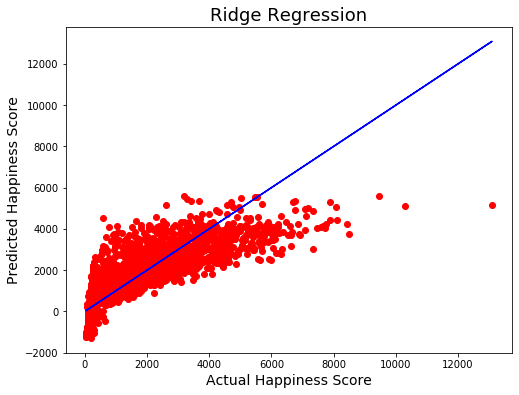

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_rd, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

## Decision Tree Regression

In [64]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'splitter': 'random'}


In [65]:
dt = DecisionTreeRegressor(criterion='friedman_mse', splitter='random')
dt.fit(x_train, y_train)
dt.score(x_train, y_train)
pred_decision = dt.predict(x_test)

dts = r2_score(y_test,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,train,targets,cv=5)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 17.681458749515233
Cross Val Score: 15.715617726490203


In [66]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_decision))
print('Mean Squared Error:',mean_squared_error(y_test,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_decision)))

Error:
Mean Absolute Error: 1058.1241143695015
Mean Squared Error: 2380545.4103493243
Root Mean Square Error: 1542.9016204377142


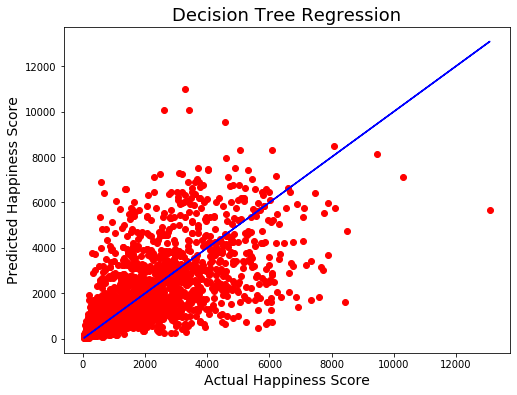

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_decision, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

## Random Forest Regression

In [68]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'n_estimators': [100,300,500]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'n_estimators': 500}


In [69]:
rf = RandomForestRegressor(n_estimators=500)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_random = rf.predict(x_test)

rfs = r2_score(y_test,pred_random)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,train,targets,cv=5)
rfc = rfscore.mean() 
print('Cross Val Score:',rfc*100)

R2 Score: 56.168679081161855
Cross Val Score: 54.77698588595879


In [70]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_random))
print('Mean Squared Error:',mean_squared_error(y_test,pred_random))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_random)))

Error:
Mean Absolute Error: 776.3327655225806
Mean Squared Error: 1267544.9328649759
Root Mean Square Error: 1125.8529801288337


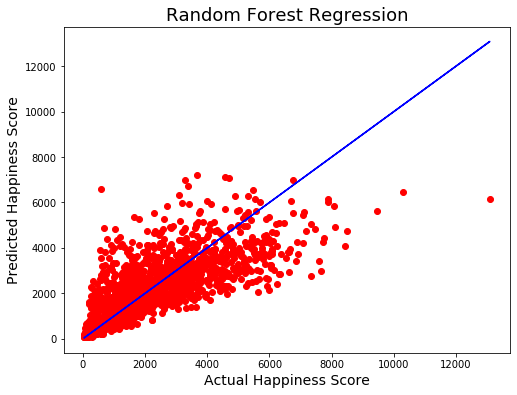

In [71]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_random, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Random Forest Regression',fontsize=18)
plt.show()

## Support Vector Machine Regression

In [72]:
from sklearn.svm import SVR

parameters = { 'kernel': ['linear', 'poly','rbf', 'sigmoid']} #'gamma': ['auto', 'scale']
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'kernel': 'linear'}


In [73]:
sv = SVR(kernel = 'linear', gamma = 'auto')
sv.fit(x_train, y_train)
sv.score(x_train, y_train)
pred_vector = sv.predict(x_test)

svs = r2_score(y_test,pred_vector)
print('R2 Score:',svs*100)

svscore = cross_val_score(sv,train,targets,cv=5)
svc = svscore.mean() 
print('Cross Val Score:',svc*100)

R2 Score: 48.53045958818905
Cross Val Score: 45.33621385811155


In [74]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_vector))
print('Mean Squared Error:',mean_squared_error(y_test,pred_vector))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_vector)))

Error:
Mean Absolute Error: 872.5497154859606
Mean Squared Error: 1488432.3305401632
Root Mean Square Error: 1220.013250149425


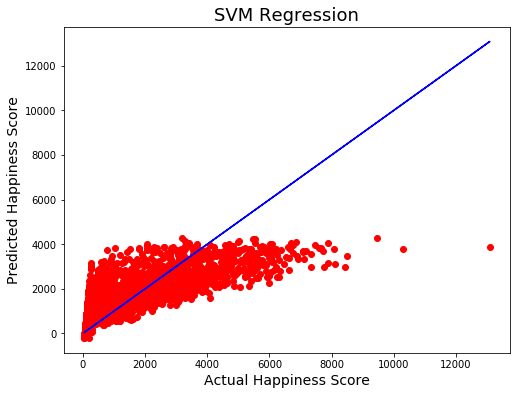

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_vector, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('SVM Regression',fontsize=18)
plt.show()

## Gradient Boost Regression

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(x_train, y_train)
gbr.score(x_train, y_train)
pred_gb = gbr.predict(x_test)

gbs = r2_score(y_test,pred_gb)
print('R2 Score:',gbs*100)

gbscore = cross_val_score(gbr,train,targets,cv=5)
gbc = gbscore.mean() 
print('Cross Val Score:',gbc*100)

R2 Score: 61.30752168390811
Cross Val Score: 59.244083515599996


In [77]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_gb))
print('Mean Squared Error:',mean_squared_error(y_test,pred_gb))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_gb)))

Error:
Mean Absolute Error: 729.3325296412257
Mean Squared Error: 1118936.272086465
Root Mean Square Error: 1057.7978408403305


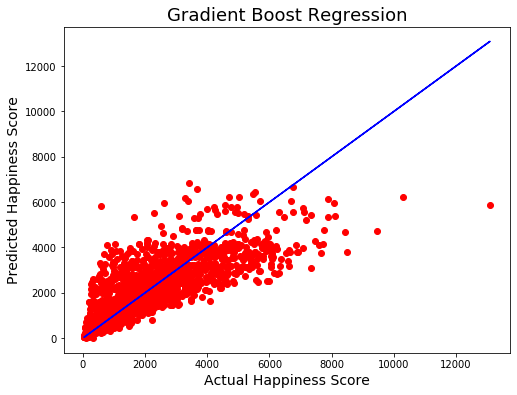

In [78]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_gb, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Gradient Boost Regression',fontsize=18)
plt.show()

## Picking the best model

In [79]:
d1 = lms-lmc
d2 = lss-lsc
d3 = rds-rdc
d4 = dts-dtc
d5 = rfs-rfc
d6 = svs-svc
d7 = gbs-gbc

In [80]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Lasso Regression', 'Ridge Regression', 
              'Decision Tree Regression','Random Forest Regression','SVM','Gradient Boost Regression'],
    'R2 Score': [lms*100, lss*100, rds*100, dts*100, rfs*100, svs*100, gbs*100],
    'Cross Val Score': [lmc*100, lsc*100, rdc*100, dtc*100, rfc*100, svc*100, gbc*100],
    'Difference': [d1*100, d2*100, d3*100, d4*100, d5*100, d6*100, d7*100] 
})
models.sort_values(by='Difference', ascending=True)

,Model,R2 Score,Cross Val Score,Difference
4,Random Forest Regression,56.168679,54.776986,1.391693
3,Decision Tree Regression,17.681459,15.715618,1.965841
6,Gradient Boost Regression,61.307522,59.244084,2.063438
0,Linear Regression,58.336822,55.821759,2.515063
2,Ridge Regression,58.336822,55.821759,2.515063
1,Lasso Regression,58.336841,55.821771,2.515069
5,SVM,48.530460,45.336214,3.194246


The top 3 best performing models are DecisionTree, GradientBoost and RandomForest Regressor's, however since decisiontree is giving the least accuracy score; We'll pick the next model that is Linear Regression

Hence the models are
- Gradient Boost
- Random Forest
- Linear Regression

In [81]:
pred_gb = gbr.predict(test)
df = pd.DataFrame(pred_gb)
df.to_csv('GradientBoost_preddictions.csv')

In [82]:
pred_random = rf.predict(test)
df = pd.DataFrame(pred_random)
df.to_csv('RandomForest_preddictions.csv')

In [83]:
pred_linear = lm.predict(test)
df = pd.DataFrame(pred_linear)
df.to_csv('LinearReg_preddictions.csv')

In [84]:
gradient_predictions = pd.read_csv('GradientBoost_preddictions.csv')
gradient_predictions.head()

,Unnamed: 0,0
0,0,1666.076431
1,1,1469.387212
2,2,553.394529
3,3,2593.638014
4,4,5977.597787


In [85]:
random_predictions = pd.read_csv('RandomForest_preddictions.csv')
random_predictions.head()

,Unnamed: 0,0
0,0,1612.056266
1,1,1286.131186
2,2,586.398024
3,3,2325.102765
4,4,5504.659960


In [86]:
linear_predictions = pd.read_csv('LinearReg_preddictions.csv')
linear_predictions.head()

,Unnamed: 0,0
0,0,1838.534857
1,1,1489.469759
2,2,1839.252905
3,3,2567.693455
4,4,5131.489679
